# Analytics Edge Final Project: Nidhish Nerur, Angel Xie, Brimar Olafsson, Yuki Yu, and James Pinter

In [ ]:
!wget https://raw.githubusercontent.com/brianliu12437/InterpretingBlackBoxTreeEnsembles/refs/heads/main/fire.py

--2024-12-07 23:11:48--  https://raw.githubusercontent.com/brianliu12437/InterpretingBlackBoxTreeEnsembles/refs/heads/main/fire.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3823 (3.7K) [text/plain]
Saving to: ‘fire.py’

fire.py             100%[===================>]   3.73K  --.-KB/s    in 0s      

2024-12-07 23:11:48 (84.6 MB/s) - ‘fire.py’ saved [3823/3823]



In [ ]:
!pip install bayesian-optimization
!pip install scikeras

In [ ]:
!pip install l0learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 86.6 MB/s eta 0:00:00


In [ ]:
#Imports
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import fire
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from bayes_opt import BayesianOptimization
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, STATUS_FAIL
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LassoLarsIC
import l0learn

warnings.filterwarnings('ignore')

## Part 1: Exploratory Data Analysis

In [ ]:
#Read in dataset
df = pd.read_csv("StudentPerformanceFactors.csv")
#View first 5 rows of the dataframe
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
#6607 observations with 20 columns
df.shape

(6607, 20)

In [ ]:
#Range of features including family background, school engagement, and extracurricular activity
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
#Overview of feature datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
#We need to handle missing values in Teacher_Quality, Parental_Education_Level, Distance_from_Home
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:


#Summary statistics for numeric columns
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


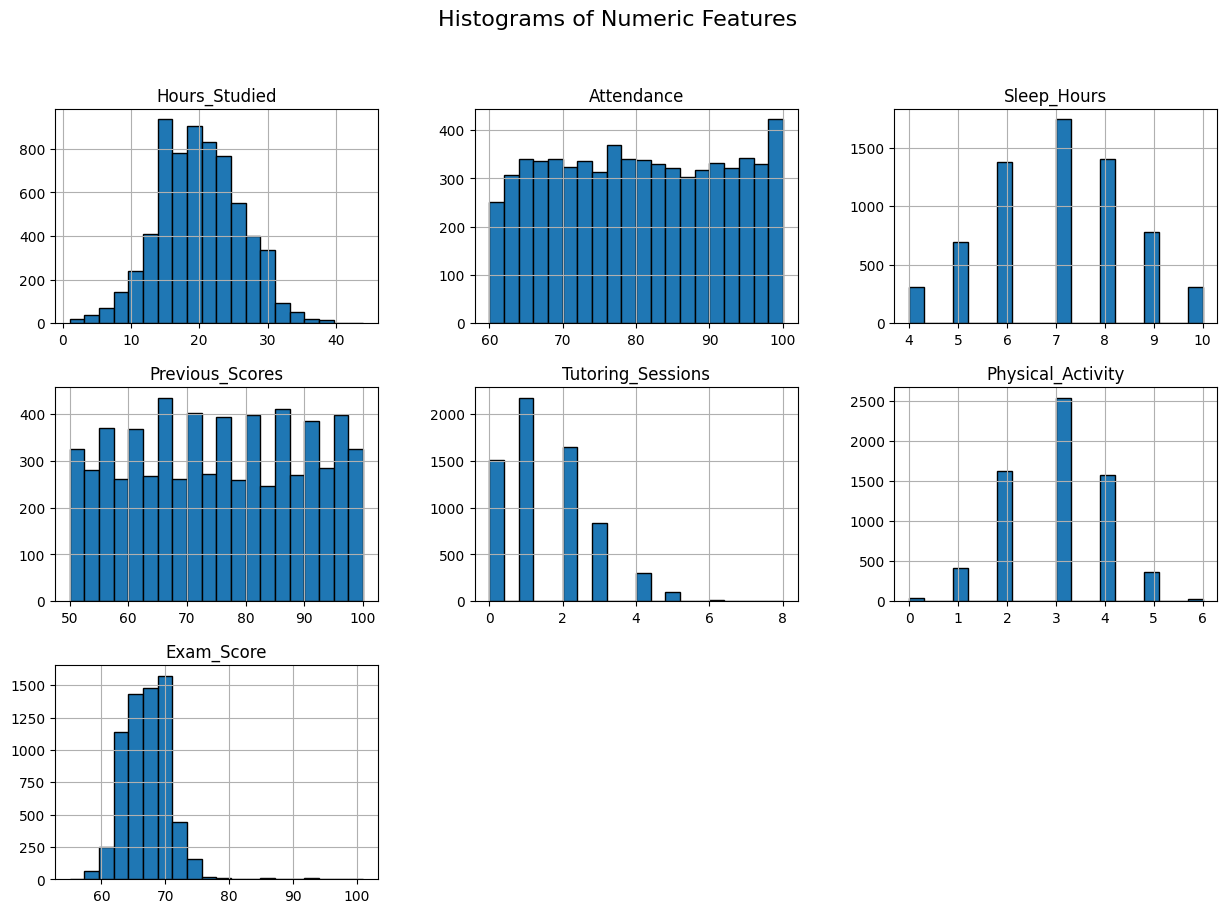

In [ ]:
#Extract numeric columns and visualize histograms
numeric_col = df[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]]

#We are interested in predicting Exam_Score and we plan to bin this feature into categorical ranges
numeric_col.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

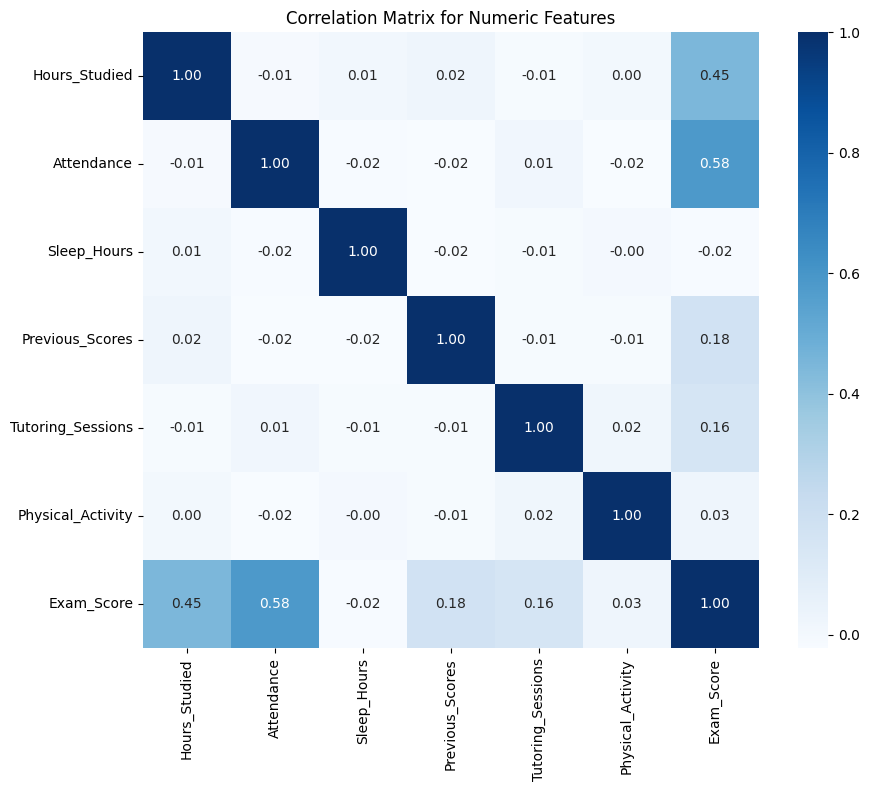

In [ ]:
#Compute the correlation matrix
corr_matrix = numeric_col.corr()

#Create a heatmap using Seaborn
#There does not appear to be risk of multicollinearity
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()

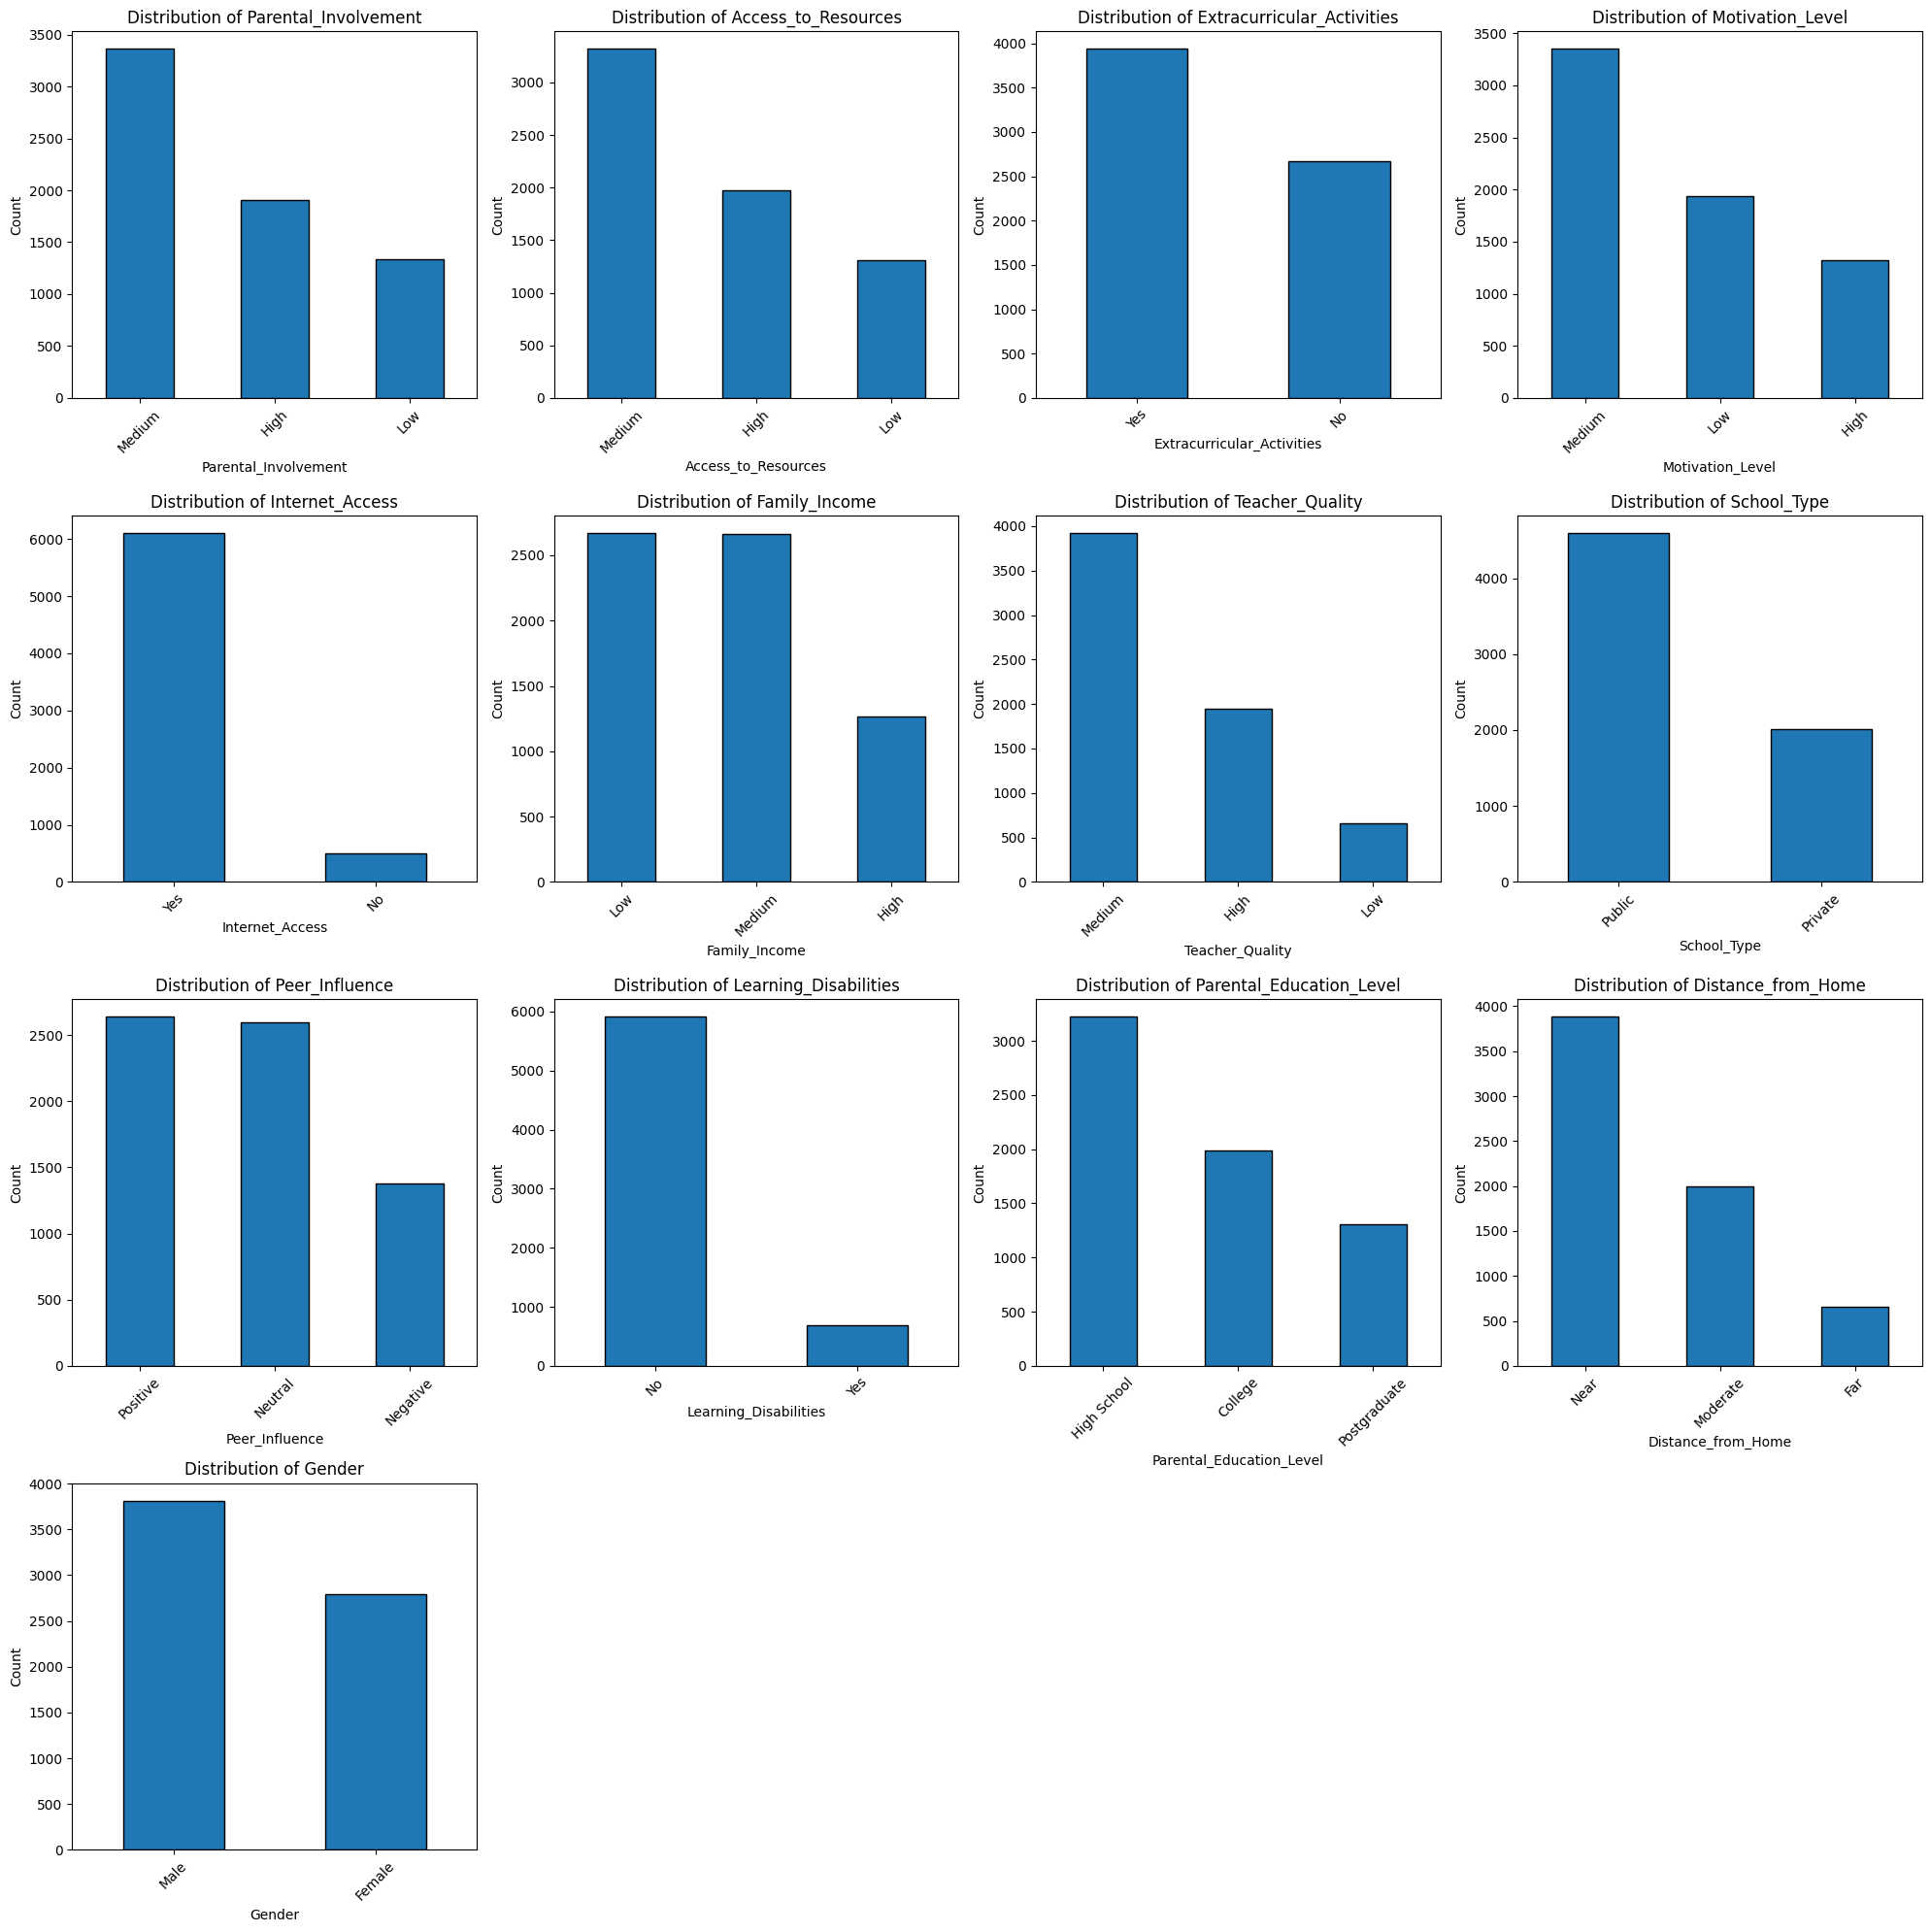

In [ ]:
#Extract categorical variables and plot bar graphs
cat_col = df[[
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Learning_Disabilities",
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]]

#Set up a grid for subplots
num_plots = len(cat_col.columns)
#Calculate rows to fit 4 columns per row
nrows = (num_plots + 3) // 4
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, 5 * nrows))
axes = axes.flatten()

#Create bar plots for each categorical feature
for i, column in enumerate(cat_col.columns):
    cat_col[column].value_counts().plot(
        kind='bar', ax=axes[i], edgecolor='black'
    )
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

#Hide any unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Part 2: Feature Engineering and Data Preprocessing

Data Preparation Steps
1. Map ordinal categorical features to numeric values
2. Create new features based on existing ones that seem relevant for our task
3. Remove irrelevant variables in predicting `Exam_Score`
4. Handle missing values
5. Scale the numeric features so they are standardized
6. Apply one-hot encoding for categorical features

CATEGORICAL PREDICTION TASK: <br>
7. Bin the `Exam_Score` field into roughly equal groupings

In [ ]:
#Define mapping dictionary
mapping = {"Low": 1, "Medium": 2, "High": 3}

#Apply the mapping to the columns that have natural ordering
df["Parental_Involvement_Mapped"] = df["Parental_Involvement"].map(mapping)
df["Access_to_Resources_Mapped"] = df["Access_to_Resources"].map(mapping)
df["Motivation_Level_Mapped"] = df["Motivation_Level"].map(mapping)
df["Family_Income_Mapped"] = df["Family_Income"].map(mapping)
df["Teacher_Quality_Mapped"] = df["Teacher_Quality"].map(mapping)

#Define distance mapping dictionary
distance_mapping = {"Near": 1, "Moderate": 2, "Far": 3}
#Apply mapping to ordered distance column
df["Distance_from_Home_Mapped"] = df["Distance_from_Home"].map(distance_mapping)

#Define education mapping
education_mapping = {"High School": 1, "College": 2, "Postgraduate": 3}
#Apply the mapping to the education column
df["Parental_Education_Level_Mapped"] = df["Parental_Education_Level"].map(education_mapping)

In [ ]:
#Feature engineering, create new features based on existing ones
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Parental_Involvement_Mapped',
       'Access_to_Resources_Mapped', 'Motivation_Level_Mapped',
       'Family_Income_Mapped', 'Teacher_Quality_Mapped',
       'Distance_from_Home_Mapped', 'Parental_Education_Level_Mapped'],
      dtype='object')

In [ ]:
#Create relevant interactions terms
#Interaction between hours studied and class attendance
df["Class_Engagement"] = df["Hours_Studied"] * df["Attendance"]

#Interaction between parental involvement and access to resources
df["Home_Support"] = df["Parental_Involvement_Mapped"] * df["Access_to_Resources_Mapped"]

#Interaction between motivation level and tutoring sessions
df["Learning_Engagement"] = df["Motivation_Level_Mapped"] * df["Tutoring_Sessions"]

In [ ]:
#Ratio of hours studied to sleep
df["Study_Sleep_Ratio"] = df["Hours_Studied"] / df["Sleep_Hours"]

In [ ]:
#Balance of physical activity and sleep levels
df["Health_Balance"] = df["Physical_Activity"] + df["Sleep_Hours"]

In [ ]:
#Remove variables
df = df.drop(columns = ["Parental_Involvement", "Access_to_Resources",
                        "Motivation_Level", "Family_Income", "Teacher_Quality",
                       "Distance_from_Home", "Parental_Education_Level"])

In [ ]:
#Handle missing values
#Selecting the categorical fields for imputation
cat_fields = ["Parental_Education_Level_Mapped", "Teacher_Quality_Mapped", "Distance_from_Home_Mapped"]

#Impute categorical columns with mode
for col in cat_fields:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
#No missing values now
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Internet_Access,0
Tutoring_Sessions,0
School_Type,0
Peer_Influence,0
Physical_Activity,0


In [ ]:
#Standardize numeric features
#List of numeric features
numeric_features = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores",
                   "Tutoring_Sessions", "Physical_Activity", "Class_Engagement",
                   "Home_Support", "Learning_Engagement", "Study_Sleep_Ratio",
                   "Health_Balance"]

#Standardize the numeric features including the outcome variable
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Extracurricular_Activities',
       'Sleep_Hours', 'Previous_Scores', 'Internet_Access',
       'Tutoring_Sessions', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities', 'Gender', 'Exam_Score',
       'Parental_Involvement_Mapped', 'Access_to_Resources_Mapped',
       'Motivation_Level_Mapped', 'Family_Income_Mapped',
       'Teacher_Quality_Mapped', 'Distance_from_Home_Mapped',
       'Parental_Education_Level_Mapped', 'Class_Engagement', 'Home_Support',
       'Learning_Engagement', 'Study_Sleep_Ratio', 'Health_Balance'],
      dtype='object')

In [ ]:
#Apply one-hot encoding for remaining categorical features
categorical_columns = ["Extracurricular_Activities", "Internet_Access",
                      "School_Type", "Peer_Influence", "Learning_Disabilities",
                      "Gender"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype = int)

In [ ]:
#Move "Exam_Score" to the last column
columns = [col for col in df.columns if col != "Exam_Score"]
columns.append("Exam_Score")
df = df[columns]

## Bin Exam_Score Only for Categorical Prediction Task

In [ ]:
#Define quantile-based bins and labels
quantile_bins = [0, 0.25, 0.5, 0.75, 1]
labels = ["Low", "Average", "Good", "Excellent"]

#Create a new column with quantile-based binned scores
df["Exam_Score_Binned"] = pd.qcut(df["Exam_Score"], q=4, labels=labels)


In [ ]:
#Creates roughly even bins using percentiles
df["Exam_Score_Binned"].value_counts()

,count
Exam_Score_Binned,
Low,2131
Excellent,1625
Average,1468
Good,1383


In [ ]:
#Define exam score bin mapping dictionary
mapping = {"Low": 0, "Average": 1, "Good": 2, "Excellent": 3}

#Apply the mapping to the target
df["Exam_Score_Binned"] = df["Exam_Score_Binned"].map(mapping).astype(int)

## Part 3: Create train/test split

In [ ]:
#Regression task train/test split
X_reg = df.drop(columns = ["Exam_Score", "Exam_Score_Binned"])
y_reg = df["Exam_Score"]

#Perform an 80/20 train-test split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [ ]:
#Categorical task train/test split
X_ct = df.drop(columns = ["Exam_Score", "Exam_Score_Binned"])
y_ct = df["Exam_Score_Binned"]

#Perform an 80/20 train-test split
X_ct_train, X_ct_test, y_ct_train, y_ct_test = train_test_split(X_ct, y_ct, stratify = y_ct, test_size=0.2, random_state=42)


## Part 4: Model Development (Student Performance Classification)

## Part 4a: Base Models (No Hyperparameter Tuning)

In [ ]:
#List to store all models
models_ct = []

#Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)

#Train the model
lr.fit(X_ct_train, y_ct_train)
models_ct.append(("Base Logistic Regression", lr))

In [ ]:
#Initialize the decision tree model
cart = DecisionTreeClassifier(random_state=42)

#Train the model
cart.fit(X_ct_train, y_ct_train)
models_ct.append(("Base Classification Tree", cart))

In [ ]:
# Initialize the random forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf.fit(X_ct_train, y_ct_train)
models_ct.append(("Base Random Forest Classifier", rf))

In [ ]:
# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb.fit(X_ct_train, y_ct_train)
models_ct.append(("Base XGBoost Classifier", xgb))

In [ ]:
from tensorflow.keras.utils import to_categorical  # Import this utility

# Convert target variable to one-hot encoding if needed
y_ct_train_cat = to_categorical(y_ct_train)
y_ct_test_cat = to_categorical(y_ct_test)

# Define the model
nn = Sequential([
    Dense(64, input_dim=X_ct_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_ct_train_cat.shape[1], activation='sigmoid')  # Output layer with sigmoid
])

# Compile the model
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn.fit(X_ct_train, y_ct_train_cat, epochs=20, batch_size=32, validation_split=0.2)

models_ct.append(("Base Neural Network", nn))

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4515 - loss: 1.2311 - val_accuracy: 0.7181 - val_loss: 0.7257
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.6163 - val_accuracy: 0.8202 - val_loss: 0.5096
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.4576 - val_accuracy: 0.8439 - val_loss: 0.4532
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.3897 - val_accuracy: 0.8562 - val_loss: 0.4251
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8852 - loss: 0.3353 - val_accuracy: 0.8590 - val_loss: 0.3920
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8865 - loss: 0.3081 - val_accuracy: 0.8780 - val_loss: 0.3623
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9026 - loss: 0.2967 - val_accuracy: 0.8969 - val_loss: 0.3346
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9165 - loss: 0.2541 - val_accuracy: 0

## Part 4b: Models with Hyperparameter Tuning

In [ ]:
models_ct_ht = []

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define the hyperparameter search space for Logistic Regression
param_space = {
    'C': [0.01, 0.1, 1, 10],                # Inverse of regularization strength
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
lr_random_search = RandomizedSearchCV(
    lr,
    param_space,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    random_state=42,
    verbose=1
)

# Train the model using RandomizedSearchCV
lr_random_search.fit(X_ct_train, y_ct_train)

# Get the best hyperparameters and corresponding score
print(f"Best Hyperparameters: {lr_random_search.best_params_}")
print(f"Best Cross-Validation Score: {lr_random_search.best_score_}")

# Get the best model and evaluate it on the test set
lr_random_search_best_model = lr_random_search.best_estimator_
y_pred_test = lr_random_search_best_model.predict(X_ct_test)

# Evaluate performance
print("Classification Report on Test Set:")
print(classification_report(y_ct_test, y_pred_test))

# Append the best model to models_ct_ht
models_ct_ht = []  # Ensure models_ct_ht is initialized
models_ct_ht.append(("Tuned Logistic Regression", lr_random_search_best_model))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'max_iter': 500, 'fit_intercept': True, 'class_weight': None, 'C': 10}
Best Cross-Validation Score: 0.9455061494796594
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       426
           1       0.93      0.95      0.94       294
           2       0.93      0.94      0.93       277
           3       0.97      0.94      0.96       325

    accuracy                           0.95      1322
   macro avg       0.95      0.95      0.95      1322
weighted avg       0.95      0.95      0.95      1322



In [ ]:
# Define the hyperparameter search space for CART Decision Tree
param_space = {
    'criterion': ['gini', 'entropy'],   # Splitting criteria
    'max_depth': [3, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10,],
    'min_samples_leaf': [1, 2, 10],             # Minimum samples in a leaf node
    'class_weight': [None, 'balanced']             # Adjust class imbalance
}

# Initialize the Decision Tree model
cart = DecisionTreeClassifier(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
cart_random_search = RandomizedSearchCV(
    cart,
    param_space,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    random_state=42,
    verbose=1
)

# Train the model using RandomizedSearchCV
cart_random_search.fit(X_ct_train, y_ct_train)

# Get the best hyperparameters and corresponding score
print(f"Best Hyperparameters: {cart_random_search.best_params_}")
print(f"Best Cross-Validation Score: {cart_random_search.best_score_}")

# Get the best model and evaluate it on the test set
cart_random_search_best_model = cart_random_search.best_estimator_
y_pred_test = cart_random_search_best_model.predict(X_ct_test)

# Evaluate performance
print("Classification Report on Test Set:")
print(classification_report(y_ct_test, y_pred_test))

# Append the best model to models_ct_ht
models_ct_ht.append(("Tuned CART Decision Tree", cart_random_search_best_model))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None}
Best Cross-Validation Score: 0.6469252601702933
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       426
           1       0.47      0.48      0.47       294
           2       0.46      0.45      0.45       277
           3       0.78      0.74      0.76       325

    accuracy                           0.64      1322
   macro avg       0.62      0.62      0.62      1322
weighted avg       0.64      0.64      0.64      1322



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define the hyperparameter search space for Random Forest
param_space = {
    'n_estimators': [10, 50, 100],              # Number of trees in the forest
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5],                # Minimum samples in a leaf node
    'class_weight': [None, 'balanced']                # Adjust class imbalance
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
rf_random_search = RandomizedSearchCV(
    rf,
    param_space,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    random_state=42,
    verbose=1
)

# Train the model using RandomizedSearchCV
rf_random_search.fit(X_ct_train, y_ct_train)

# Get the best hyperparameters and corresponding score
print(f"Best Hyperparameters: {rf_random_search.best_params_}")
print(f"Best Cross-Validation Score: {rf_random_search.best_score_}")

# Get the best model and evaluate it on the test set
rf_random_search_best_model = rf_random_search.best_estimator_
y_pred_test = rf_random_search_best_model.predict(X_ct_test)

# Evaluate performance
print("Classification Report on Test Set:")
print(classification_report(y_ct_test, y_pred_test))

# Append the best model to models_ct_ht
models_ct_ht.append(("Tuned Random Forest", rf_random_search_best_model))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Cross-Validation Score: 0.6705771050141911
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       426
           1       0.51      0.44      0.47       294
           2       0.53      0.46      0.49       277
           3       0.77      0.81      0.79       325

    accuracy                           0.67      1322
   macro avg       0.64      0.64      0.64      1322
weighted avg       0.65      0.67      0.66      1322



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Simplified hyperparameter search space for XGBoost
param_space = {
    'n_estimators': [10, 50, 100],                 # Number of trees
    'max_depth': [3, 5, 7],                         # Maximum tree depth
    'learning_rate': [0.05, 0.1, 0.2],              # Step size shrinkage
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Use RandomizedSearchCV to find the best hyperparameters
xgb_random_search = RandomizedSearchCV(
    xgb,
    param_space,
    n_iter=10,  # Fewer iterations to speed up runtime
    cv=3,       # Use 3-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    random_state=42,
    verbose=1
)

# Train the model using RandomizedSearchCV
xgb_random_search.fit(X_ct_train, y_ct_train)

# Get the best hyperparameters and corresponding score
print(f"Best Hyperparameters: {xgb_random_search.best_params_}")
print(f"Best Cross-Validation Score: {xgb_random_search.best_score_}")

# Get the best model and evaluate it on the test set
xgb_random_search_best_model = xgb_random_search.best_estimator_
y_pred_test = xgb_random_search_best_model.predict(X_ct_test)

# Evaluate performance
print("Classification Report on Test Set:")
print(classification_report(y_ct_test, y_pred_test))

# Append the best model to models_ct_ht
models_ct_ht.append(("Tuned XGBoost", xgb_random_search_best_model))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}
Best Cross-Validation Score: 0.7585615566431466
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       426
           1       0.63      0.66      0.64       294
           2       0.63      0.63      0.63       277
           3       0.88      0.83      0.86       325

    accuracy                           0.77      1322
   macro avg       0.76      0.75      0.75      1322
weighted avg       0.77      0.77      0.77      1322



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Simplified hyperparameter search space for SVM
param_space = {
    'C': [0.1, 1, 10, 100],                # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'degree': [2, 3],                      # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],            # Kernel coefficient
    'class_weight': [None, 'balanced']     # Adjust class imbalance
}

# Initialize the SVM model
svm = SVC(probability = True, random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
svm_random_search = RandomizedSearchCV(
    svm,
    param_space,
    n_iter=10,  # Fewer iterations to speed up runtime
    cv=3,       # Use 3-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    random_state=42,
    verbose=1
)

# Train the model using RandomizedSearchCV
svm_random_search.fit(X_ct_train, y_ct_train)

# Get the best hyperparameters and corresponding score
print(f"Best Hyperparameters: {svm_random_search.best_params_}")
print(f"Best Cross-Validation Score: {svm_random_search.best_score_}")

# Get the best model and evaluate it on the test set
svm_random_search_best_model = svm_random_search.best_estimator_
y_pred_test = svm_random_search_best_model.predict(X_ct_test)

# Evaluate performance
print("Classification Report on Test Set:")
print(classification_report(y_ct_test, y_pred_test))

# Append the best model to models_ct_ht
models_ct_ht.append(("Tuned SVM Classifier", svm_random_search_best_model))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define the hyperparameter search space for LightGBM
param_space = {
    'n_estimators': [50, 100, 200, 300],               # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],          # Learning rate for boosting
    'num_leaves': [15, 31, 63, 127],                  # Number of leaves in each tree
    'max_depth': [-1, 10, 20, 30],                    # Maximum depth of each tree
    'min_child_samples': [10, 20, 30, 50],            # Minimum samples per leaf
    'subsample': [0.6, 0.8, 1.0],                     # Subsample ratio for boosting
    'colsample_bytree': [0.6, 0.8, 1.0],              # Subsample ratio for features
    'reg_alpha': [0, 0.1, 0.5],                       # L1 regularization term
    'reg_lambda': [0, 0.1, 0.5],                      # L2 regularization term
    'class_weight': [None, 'balanced']                # Adjust for imbalanced classes
}

# Initialize the LightGBM Classifier
lgbm = LGBMClassifier(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
lgbm_random_search = RandomizedSearchCV(
    lgbm,
    param_space,
    n_iter=50,  # Number of random combinations to try
    cv=3,       # Use 3-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    random_state=42,
    verbose=1
)

# Train the model using RandomizedSearchCV
lgbm_random_search.fit(X_ct_train, y_ct_train)

# Get the best hyperparameters and corresponding score
print(f"Best Hyperparameters: {lgbm_random_search.best_params_}")
print(f"Best Cross-Validation Score: {lgbm_random_search.best_score_}")

# Get the best model and evaluate it on the test set
lgbm_random_search_best_model = lgbm_random_search.best_estimator_
y_pred_test = lgbm_random_search_best_model.predict(X_ct_test)

# Evaluate performance
print("Classification Report on Test Set:")
print(classification_report(y_ct_test, y_pred_test))

# Append the best model to models_ct_ht
models_ct_ht.append(("Tuned LightGBM", lgbm_random_search_best_model))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define the hyperparameter search space for kNN
param_space = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],          # Number of neighbors to consider
    'weights': ['uniform', 'distance'],           # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'p': [1, 2]                                   # Power parameter for Minkowski distance
}

# Initialize the kNN Classifier
knn = KNeighborsClassifier()

# Use RandomizedSearchCV to find the best hyperparameters
knn_random_search = RandomizedSearchCV(
    knn,
    param_space,
    n_iter=20,  # Number of random combinations to try
    cv=3,       # Use 3-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    random_state=42,
    verbose=1
)

# Train the model using RandomizedSearchCV
knn_random_search.fit(X_ct_train, y_ct_train)

# Get the best hyperparameters and corresponding score
print(f"Best Hyperparameters: {knn_random_search.best_params_}")
print(f"Best Cross-Validation Score: {knn_random_search.best_score_}")

# Get the best model and evaluate it on the test set
knn_random_search_best_model = knn_random_search.best_estimator_
y_pred_test = knn_random_search_best_model.predict(X_ct_test)

# Evaluate performance
print("Classification Report on Test Set:")
print(classification_report(y_ct_test, y_pred_test))

# Append the best model to models_ct_ht
models_ct_ht.append(("Tuned kNN", knn_random_search_best_model))


## Part 5: Evaluate Results (Classification)

In [ ]:
def evaluate_classification_models(models_cls, X_train, X_test, y_train, y_test):
    """
    Evaluates classification models (both scikit-learn and custom models) and outputs a table of in-sample and out-of-sample metrics.

    Args:
        models_cls (list): List of tuples containing model names and model objects.
        X_train (pd.DataFrame or np.ndarray): Training feature matrix.
        X_test (pd.DataFrame or np.ndarray): Testing feature matrix.
        y_train (pd.Series or np.ndarray): Training target values.
        y_test (pd.Series or np.ndarray): Testing target values.

    Returns:
        pd.DataFrame: Table of in-sample and out-of-sample metrics (Accuracy, ROC AUC, Precision, Recall).
    """
    from sklearn.metrics import (
        accuracy_score,
        roc_auc_score,
        precision_score,
        recall_score
    )
    from scipy.special import softmax  # For normalizing logits
    import numpy as np
    import pandas as pd

    results = []

    for name, model in models_cls:
        try:
            # Predict for scikit-learn or models with `predict` and `predict_proba` methods
            if hasattr(model, "predict"):
                y_train_pred = model.predict(X_train)
                y_test_pred = model.predict(X_test)

                # Handle probabilistic outputs (e.g., for neural networks or some classifiers)
                if len(y_train_pred.shape) > 1:  # Probabilistic output
                    y_train_pred_discrete = np.argmax(y_train_pred, axis=1)
                    y_test_pred_discrete = np.argmax(y_test_pred, axis=1)

                    # Apply softmax if not already normalized
                    y_train_proba = softmax(y_train_pred, axis=1)
                    y_test_proba = softmax(y_test_pred, axis=1)
                else:  # Already discrete predictions
                    y_train_pred_discrete = y_train_pred
                    y_test_pred_discrete = y_test_pred
                    y_train_proba = None
                    y_test_proba = None

                # If the model supports probability prediction for ROC AUC
                if hasattr(model, "predict_proba"):
                    y_train_proba = model.predict_proba(X_train)
                    y_test_proba = model.predict_proba(X_test)

            elif hasattr(model, "forward") or hasattr(model, "fit"):
                # Predict for PyTorch or other custom models
                model.eval()  # Set to evaluation mode if applicable (PyTorch)
                with torch.no_grad():  # Use no-grad for PyTorch-like frameworks
                    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
                    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
                    y_train_pred = model(X_train_tensor).numpy()
                    y_test_pred = model(X_test_tensor).numpy()

                    # Convert logits to probabilities using softmax
                    y_train_proba = softmax(y_train_pred, axis=1)
                    y_test_proba = softmax(y_test_pred, axis=1)
                    y_train_pred_discrete = np.argmax(y_train_proba, axis=1)
                    y_test_pred_discrete = np.argmax(y_test_proba, axis=1)

            else:
                raise ValueError(f"Model {name} does not have a compatible prediction method.")

            # Handle binary/multiclass ROC AUC
            if y_train_proba is not None and len(y_train_proba.shape) > 1:
                # Multiclass: Use full probability matrix
                roc_auc_train = roc_auc_score(y_train, y_train_proba, multi_class='ovr', average='weighted')
                roc_auc_test = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')
            elif y_train_proba is not None:
                # Binary: Use probabilities of positive class
                roc_auc_train = roc_auc_score(y_train, y_train_proba)
                roc_auc_test = roc_auc_score(y_test, y_test_proba)
            else:
                # No probability output
                roc_auc_train = None
                roc_auc_test = None

            # Compute metrics
            metrics = {
                "Model": name,
                "Accuracy (In-Sample)": accuracy_score(y_train, y_train_pred_discrete),
                "Accuracy (Out-of-Sample)": accuracy_score(y_test, y_test_pred_discrete),
                "ROC AUC (In-Sample)": roc_auc_train,
                "ROC AUC (Out-of-Sample)": roc_auc_test,
                "Precision (In-Sample)": precision_score(y_train, y_train_pred_discrete, average='weighted'),
                "Precision (Out-of-Sample)": precision_score(y_test, y_test_pred_discrete, average='weighted'),
                "Recall (In-Sample)": recall_score(y_train, y_train_pred_discrete, average='weighted'),
                "Recall (Out-of-Sample)": recall_score(y_test, y_test_pred_discrete, average='weighted'),
            }
            results.append(metrics)

        except Exception as e:
            print(f"Error evaluating model {name}: {e}")

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort the DataFrame by out-of-sample Accuracy (descending) for easy comparison
    results_df.sort_values(by="Accuracy (Out-of-Sample)", ascending=False, inplace=True)

    return results_df


In [ ]:
baseline_results = evaluate_classification_models(models_ct, X_ct_train, X_ct_test, y_ct_train, y_ct_test)

166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
baseline_results

,Model,Accuracy (In-Sample),Accuracy (Out-of-Sample),ROC AUC (In-Sample),ROC AUC (Out-of-Sample),Precision (In-Sample),Precision (Out-of-Sample),Recall (In-Sample),Recall (Out-of-Sample)
0,Base Logistic Regression,0.946831,0.944781,0.992722,0.990535,0.947091,0.945296,0.946831,0.944781
4,Base Neural Network,0.938316,0.916793,0.983927,0.978681,0.938275,0.917204,0.938316,0.916793
3,Base XGBoost Classifier,1.000000,0.773828,1.000000,0.948104,1.000000,0.775798,1.000000,0.773828
2,Base Random Forest Classifier,1.000000,0.732980,1.000000,0.919688,1.000000,0.731474,1.000000,0.732980
1,Base Classification Tree,1.000000,0.626324,1.000000,0.752437,1.000000,0.628969,1.000000,0.626324



Feature Importance:
        Feature  Coefficient
23  Feature_24     2.490326
11  Feature_12     1.529801
24  Feature_25     0.200557
20  Feature_21     0.182134
2    Feature_3     0.029416
17  Feature_18    -0.232411
7    Feature_8    -0.276251
16  Feature_17    -0.278256
6    Feature_7    -0.396290
5    Feature_6    -0.446148
15  Feature_16    -0.566636
21  Feature_22    -1.062357
8    Feature_9    -1.095925
10  Feature_11    -1.113383
4    Feature_5    -1.197990
9   Feature_10    -1.346819
12  Feature_13    -1.368703
18  Feature_19    -1.481758
3    Feature_4    -2.072390
13  Feature_14    -2.092613
19  Feature_20    -2.126605
14  Feature_15    -2.388809
22  Feature_23    -2.628611
0    Feature_1    -3.008437
1    Feature_2    -5.777813


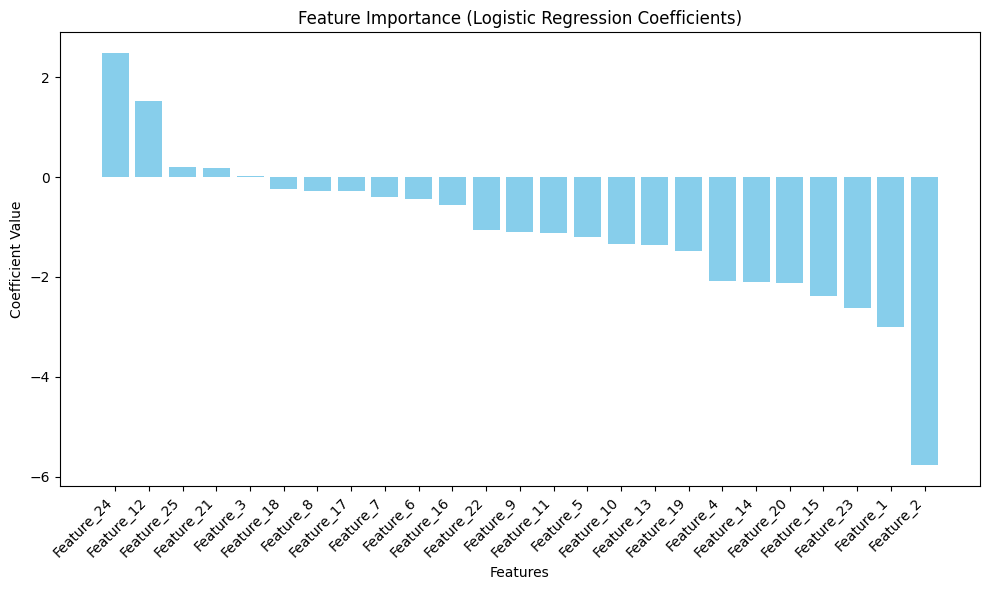

In [ ]:

# Create feature names
feature_names = [f"Feature_{i}" for i in range(1, X_ct_train.shape[1] + 1)]

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)  # Specify solver
model.fit(X_ct_train, y_ct_train)

# Make predictions
y_pred = model.predict(X_ct_test)

# Extract feature importance (coefficients) with actual feature names
coefficients = model.coef_[0]  # Access the coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:\n", feature_importance)

# Visualizing feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


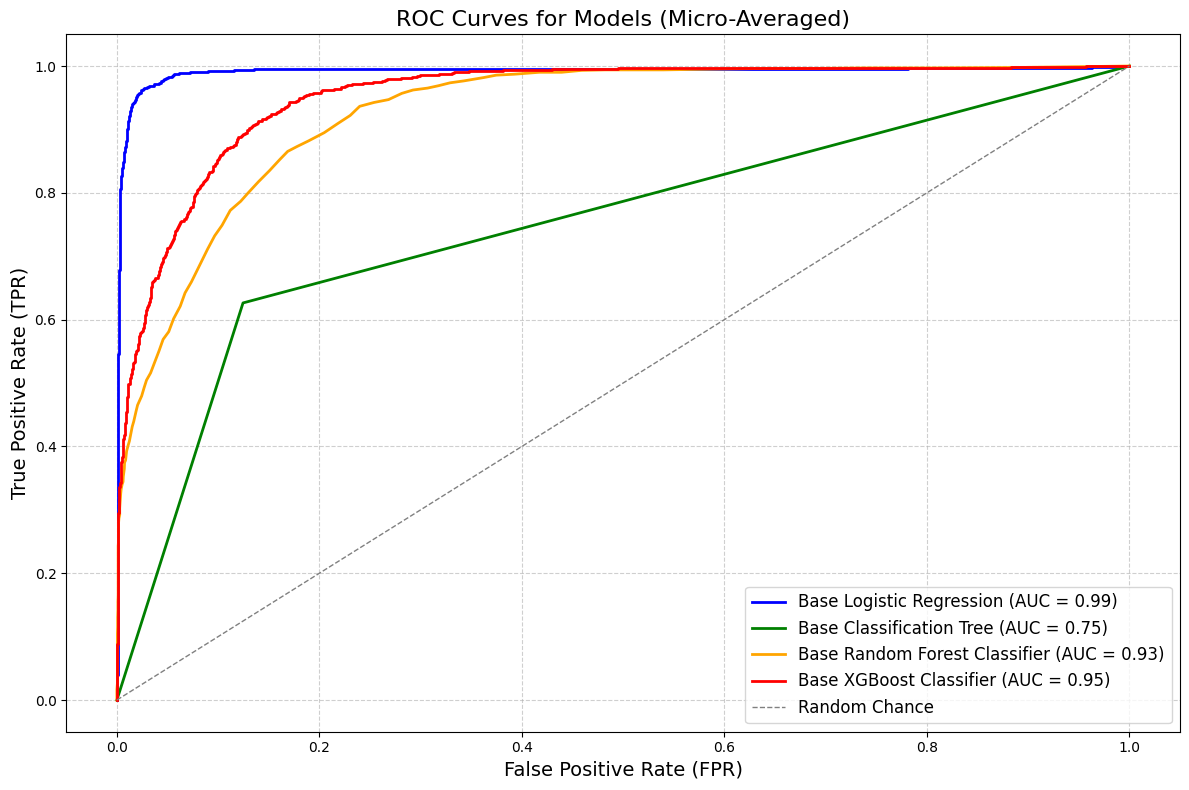

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Extract model names and fitted model objects, excluding the neural network
model_names = [name for name, _ in models_ct if name != "Base Neural Network"]
fitted_models = [model for name, model in models_ct if name != "Base Neural Network"]

# Binarize the labels for multiclass
classes = sorted(set(y_ct_test))  # Extract unique classes
y_ct_test_binarized = label_binarize(y_ct_test, classes=classes)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Define colors for each model
colors = ['blue', 'green', 'orange', 'red']
model_colors = dict(zip(model_names, colors))  # Assign a color to each model

# Loop through each model and compute ROC curve
for model_name, model in zip(model_names, fitted_models):
    # Check if the model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_ct_test)
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_ct_test)
    else:
        raise ValueError(f"Model {model_name} does not support probability prediction or decision function.")

    # Compute the micro-average ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_ct_test_binarized.ravel(), y_proba.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color=model_colors[model_name], lw=2,
             label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot diagonal for random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label="Random Chance")

# Add labels, title, and legend
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("ROC Curves for Models (Micro-Averaged)", fontsize=16)
plt.legend(fontsize=12, loc="lower right")
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


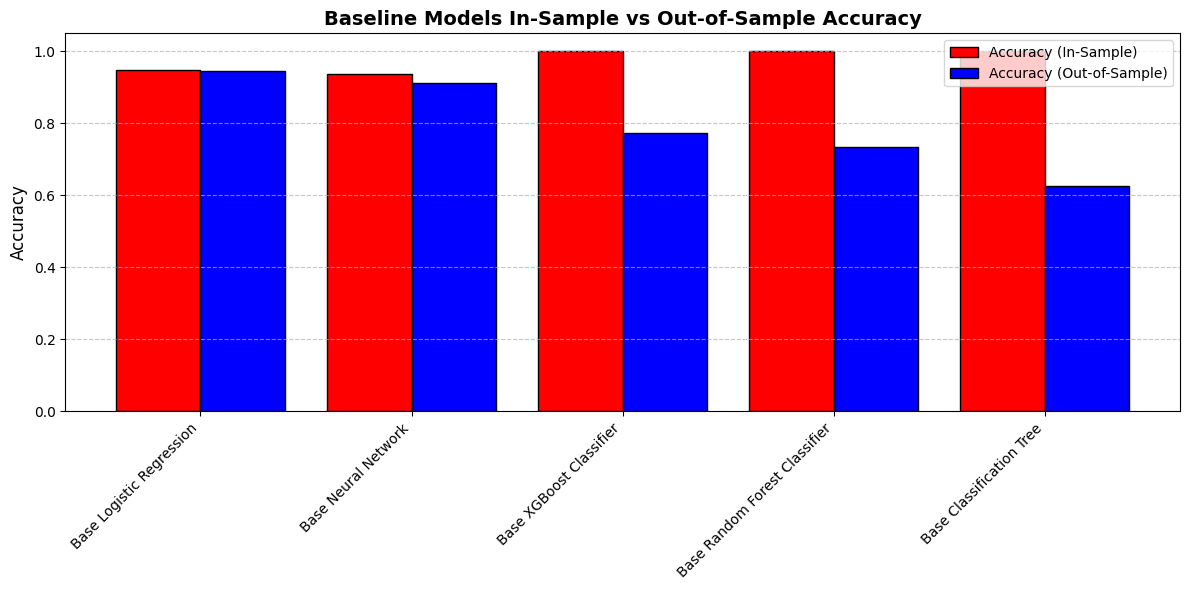

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for the bar chart
models = baseline_results['Model']
accuracy_in_sample = baseline_results['Accuracy (In-Sample)']
accuracy_out_sample = baseline_results['Accuracy (Out-of-Sample)']

# Set bar width and positions
bar_width = 0.4
x = np.arange(len(models))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width/2, accuracy_in_sample,
       width=bar_width,
       label='Accuracy (In-Sample)',
       color='red',
       edgecolor='black')  # Add black border
ax.bar(x + bar_width/2, accuracy_out_sample,
       width=bar_width,
       label='Accuracy (Out-of-Sample)',
       color='blue',
       edgecolor='black')  # Add black border

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Baseline Models In-Sample vs Out-of-Sample Accuracy', fontsize=14, weight='bold')
ax.legend(fontsize=10)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


In [ ]:
tuned_results = evaluate_classification_models(models_ct_ht, X_ct_train, X_ct_test, y_ct_train, y_ct_test)
tuned_results


,Model,Accuracy (In-Sample),Accuracy (Out-of-Sample),ROC AUC (In-Sample),ROC AUC (Out-of-Sample),Precision (In-Sample),Precision (Out-of-Sample),Recall (In-Sample),Recall (Out-of-Sample)
4,Tuned SVM Classifier,0.957805,0.954614,0.993799,0.991729,0.958344,0.955196,0.957805,0.954614
0,Tuned Logistic Regression,0.953832,0.953101,0.993475,0.991483,0.954053,0.953483,0.953832,0.953101
5,Tuned LightGBM,0.999622,0.807110,0.999998,0.957295,0.999622,0.811718,0.999622,0.807110
3,Tuned XGBoost,0.997351,0.770045,0.999972,0.937198,0.997356,0.772418,0.997351,0.770045
6,Tuned kNN,0.762346,0.672466,0.934802,0.885146,0.759238,0.667764,0.762346,0.672466
2,Tuned Random Forest,0.716556,0.668684,0.915304,0.888015,0.706000,0.654871,0.716556,0.668684
1,Tuned CART Decision Tree,0.795270,0.643722,0.957986,0.851932,0.795193,0.643907,0.795270,0.643722


In [ ]:
fitted_models

[LogisticRegression(max_iter=1000, random_state=42),
 DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)]

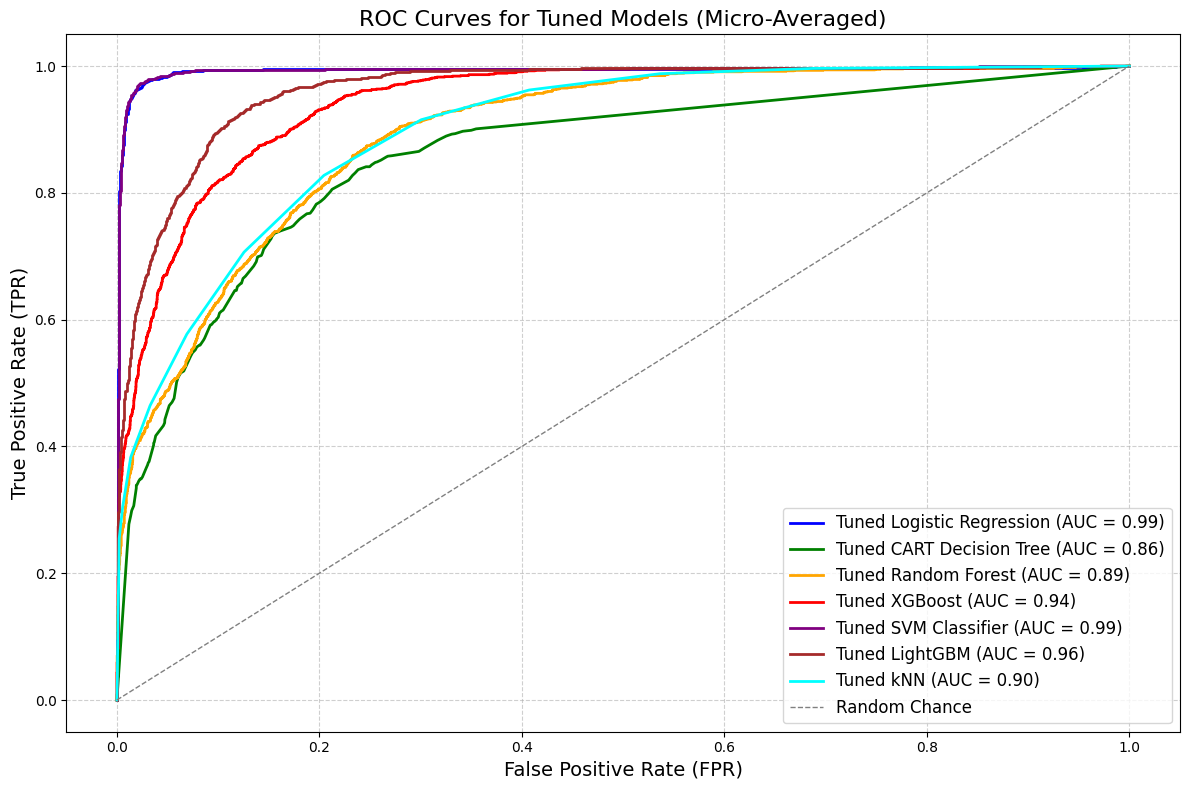

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Extract model names and fitted model objects from models_ct_ht
model_names = [name for name, _ in models_ct_ht]
fitted_models = [model for _, model in models_ct_ht]

# Binarize the labels for multiclass
classes = sorted(set(y_ct_test))  # Extract unique classes
y_ct_test_binarized = label_binarize(y_ct_test, classes=classes)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Define colors dynamically based on the number of models
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'cyan', 'magenta'][:len(model_names)]
model_colors = dict(zip(model_names, colors))  # Map each model to a unique color

# Loop through each model and compute ROC curve
for model_name, model in zip(model_names, fitted_models):
    try:
        # Check if the model supports probability prediction
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_ct_test)
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_ct_test)
        else:
            raise ValueError(f"Model {model_name} does not support probability prediction or decision function.")

        # Compute the micro-average ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_ct_test_binarized.ravel(), y_proba.ravel())
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.plot(fpr, tpr, color=model_colors[model_name], lw=2,
                 label=f"{model_name} (AUC = {roc_auc:.2f})")

    except ValueError as e:
        print(f"Skipping model {model_name} due to: {e}")

# Plot diagonal for random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label="Random Chance")

# Add labels, title, and legend
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("ROC Curves for Tuned Models (Micro-Averaged)", fontsize=16)
plt.legend(fontsize=12, loc="lower right")
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


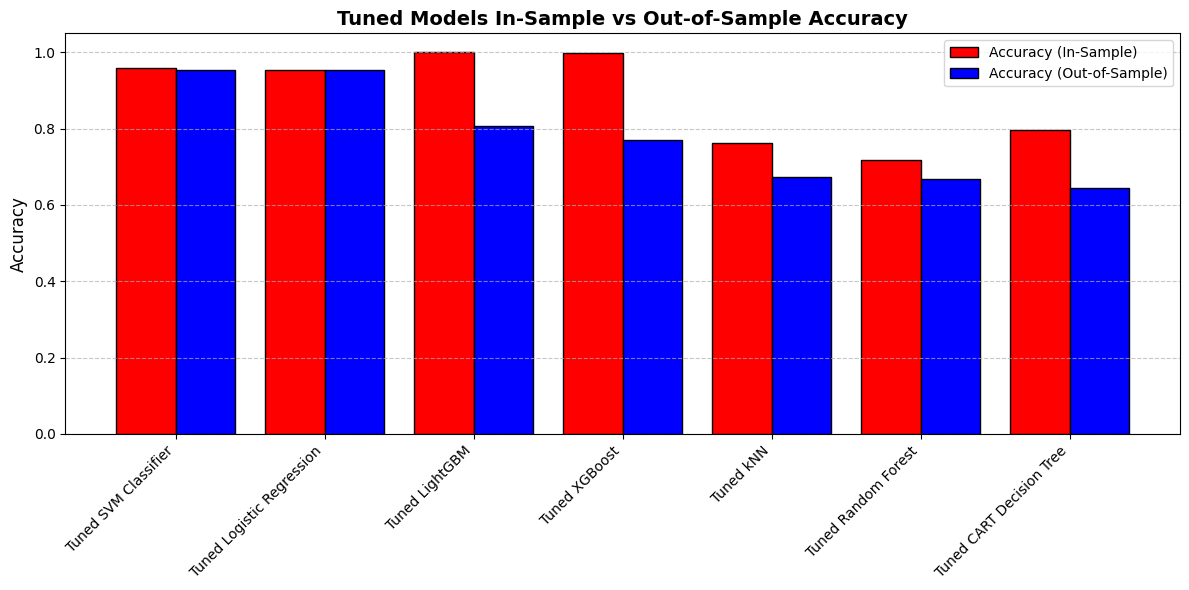

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for the bar chart from tuned_results
models = tuned_results['Model']  # Model names
accuracy_in_sample = tuned_results['Accuracy (In-Sample)']  # In-sample accuracy
accuracy_out_sample = tuned_results['Accuracy (Out-of-Sample)']  # Out-of-sample accuracy

# Set bar width and positions
bar_width = 0.4
x = np.arange(len(models))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width/2, accuracy_in_sample,
       width=bar_width,
       label='Accuracy (In-Sample)',
       color='red',
       edgecolor='black')  # Add black border
ax.bar(x + bar_width/2, accuracy_out_sample,
       width=bar_width,
       label='Accuracy (Out-of-Sample)',
       color='blue',
       edgecolor='black')  # Add black border

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Tuned Models In-Sample vs Out-of-Sample Accuracy', fontsize=14, weight='bold')
ax.legend(fontsize=10)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


## Part 5b: Ensemble the Best Models (Classification)

In [ ]:
def create_ensembles_from_top_models_classification(models_ct_ht, tuned_results, X_train, X_test, y_train, y_test):
    """
    Creates ensemble models using the top 5 models based on their out-of-sample accuracy metrics.

    Args:
        models_ct_ht (list): List of tuples containing model names and trained model objects.
        tuned_results (pd.DataFrame): DataFrame with evaluation metrics for all models, including out-of-sample accuracy.
        X_train (pd.DataFrame or np.ndarray): Training feature matrix.
        X_test (pd.DataFrame or np.ndarray): Testing feature matrix.
        y_train (pd.Series or np.ndarray): Training target values.
        y_test (pd.Series or np.ndarray): Testing target values.

    Returns:
        pd.DataFrame: Table of ensemble evaluation metrics (Accuracy, ROC AUC, Precision, Recall).
    """
    from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
    import numpy as np
    import pandas as pd

    results = []

    # Ensure y_train and y_test are numpy arrays
    if isinstance(y_train, pd.Series):
        y_train = y_train.to_numpy()
    if isinstance(y_test, pd.Series):
        y_test = y_test.to_numpy()

    # Sort tuned_results DataFrame by Accuracy (Out-of-Sample) descending
    top_models = tuned_results.sort_values(by="Accuracy (Out-of-Sample)", ascending=False).head(5)

    # Extract model names and their corresponding trained models
    top_model_names = top_models["Model"].tolist()
    top_model_objects = [model for name, model in models_ct_ht if name in top_model_names]

    # Define ensembles
    ensemble_definitions = [
        (f"Ensemble 1 ({', '.join(top_model_names[:3])})", top_model_objects[:3]),
        (f"Ensemble 2 ({', '.join(top_model_names[1:4])})", top_model_objects[1:4]),
        (f"Ensemble 3 ({', '.join(top_model_names[2:5])})", top_model_objects[2:5]),
    ]

    # Evaluate each ensemble
    for ensemble_name, ensemble_models in ensemble_definitions:
        # Generate ensemble predictions by averaging probabilities and taking the argmax
        y_train_ensemble_proba = np.mean(
            [model.predict_proba(X_train) for model in ensemble_models], axis=0
        )
        y_test_ensemble_proba = np.mean(
            [model.predict_proba(X_test) for model in ensemble_models], axis=0
        )

        # Convert probabilities to class predictions
        y_train_ensemble_pred = np.argmax(y_train_ensemble_proba, axis=1)
        y_test_ensemble_pred = np.argmax(y_test_ensemble_proba, axis=1)

        # Compute metrics
        metrics = {
            "Ensemble": ensemble_name,
            "Accuracy (In-Sample)": accuracy_score(y_train, y_train_ensemble_pred),
            "Accuracy (Out-of-Sample)": accuracy_score(y_test, y_test_ensemble_pred),
            "ROC AUC (In-Sample)": roc_auc_score(y_train, y_train_ensemble_proba, multi_class="ovr"),
            "ROC AUC (Out-of-Sample)": roc_auc_score(y_test, y_test_ensemble_proba, multi_class="ovr"),
            "Precision (In-Sample)": precision_score(y_train, y_train_ensemble_pred, average="weighted"),
            "Precision (Out-of-Sample)": precision_score(y_test, y_test_ensemble_pred, average="weighted"),
            "Recall (In-Sample)": recall_score(y_train, y_train_ensemble_pred, average="weighted"),
            "Recall (Out-of-Sample)": recall_score(y_test, y_test_ensemble_pred, average="weighted"),
        }
        results.append(metrics)

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort by out-of-sample accuracy for comparison
    results_df.sort_values(by="Accuracy (Out-of-Sample)", ascending=False, inplace=True)

    return results_df


In [ ]:
ensemble_results = create_ensembles_from_top_models_classification(models_ct_ht, tuned_results, X_ct_train, X_ct_test, y_ct_train, y_ct_test)

ensemble_results

,Ensemble,Accuracy (In-Sample),Accuracy (Out-of-Sample),ROC AUC (In-Sample),ROC AUC (Out-of-Sample),Precision (In-Sample),Precision (Out-of-Sample),Recall (In-Sample),Recall (Out-of-Sample)
0,"Ensemble 1 (Tuned SVM Classifier, Tuned Logist...",0.982403,0.946293,0.999210,0.990824,0.982500,0.946732,0.982403,0.946293
2,"Ensemble 3 (Tuned LightGBM, Tuned XGBoost, Tun...",0.988079,0.926626,0.999549,0.986205,0.988154,0.927087,0.988079,0.926626
1,"Ensemble 2 (Tuned Logistic Regression, Tuned L...",0.995648,0.891074,0.999953,0.982213,0.995673,0.892896,0.995648,0.891074


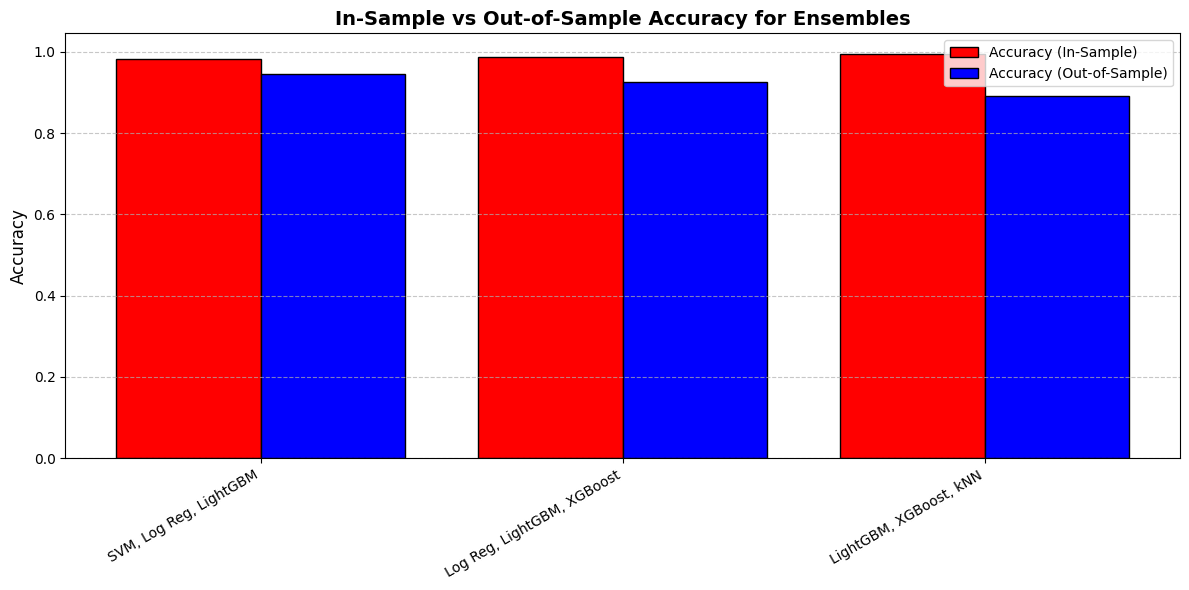

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract ensemble accuracy metrics from ensemble_results
accuracy_in_sample = ensemble_results['Accuracy (In-Sample)']
accuracy_out_sample = ensemble_results['Accuracy (Out-of-Sample)']

# Custom simplified names for the x-axis (SVM, Log Reg, LightGBM, XGBoost, kNN)
simplified_names = [
    "SVM, Log Reg, LightGBM",
    "Log Reg, LightGBM, XGBoost",
    "LightGBM, XGBoost, kNN"
]

# Ensure the number of labels matches the number of rows in ensemble_results
if len(simplified_names) != len(ensemble_results):
    raise ValueError(f"The number of x-axis labels ({len(simplified_names)}) does not match the number of ensembles ({len(ensemble_results)}).")

# Set bar width and positions
bar_width = 0.4
x = np.arange(len(simplified_names))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width / 2, accuracy_in_sample,
       width=bar_width,
       label='Accuracy (In-Sample)',
       color='red',
       edgecolor='black')  # Red bars with black border
ax.bar(x + bar_width / 2, accuracy_out_sample,
       width=bar_width,
       label='Accuracy (Out-of-Sample)',
       color='blue',
       edgecolor='black')  # Blue bars with black border

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(simplified_names, rotation=30, ha='right', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('In-Sample vs Out-of-Sample Accuracy for Ensembles', fontsize=14, weight='bold')
ax.legend(fontsize=10)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


# Part 6: Save Dataframes as Latex Tables

In [ ]:
from tabulate import tabulate

def display_dataframe_as_markdown(df, tablefmt="github"):
    """
    Displays a DataFrame as a formatted Markdown table in a Jupyter Notebook.

    Args:
        df (pd.DataFrame): The DataFrame to render.
        tablefmt (str): The tabulate formatting style (default: "github").

    Returns:
        None: Outputs a Markdown-formatted table.
    """
    markdown_table = tabulate(df, headers='keys', tablefmt=tablefmt, showindex=False)
    print(f"```\n{markdown_table}\n```")

# Example usage:
# Assume you have a DataFrame `results_df`
base_download = display_dataframe_as_markdown(baseline_results, tablefmt="fancy_grid")



```
╒═══════════════════════════════╤════════════════════════╤════════════════════════════╤═══════════════════════╤═══════════════════════════╤═════════════════════════╤═════════════════════════════╤══════════════════════╤══════════════════════════╕
│ Model                         │   Accuracy (In-Sample) │   Accuracy (Out-of-Sample) │   ROC AUC (In-Sample) │   ROC AUC (Out-of-Sample) │   Precision (In-Sample) │   Precision (Out-of-Sample) │   Recall (In-Sample) │   Recall (Out-of-Sample) │
╞═══════════════════════════════╪════════════════════════╪════════════════════════════╪═══════════════════════╪═══════════════════════════╪═════════════════════════╪═════════════════════════════╪══════════════════════╪══════════════════════════╡
│ Base Logistic Regression      │               0.946831 │                   0.944781 │              0.992722 │                  0.990535 │                0.947091 │                    0.945296 │             0.946831 │                 0.944781 │
├───────────

In [ ]:
tune_download = display_dataframe_as_markdown(tuned_results, tablefmt="fancy_grid")

```
╒═══════════════════════════╤════════════════════════╤════════════════════════════╤═══════════════════════╤═══════════════════════════╤═════════════════════════╤═════════════════════════════╤══════════════════════╤══════════════════════════╕
│ Model                     │   Accuracy (In-Sample) │   Accuracy (Out-of-Sample) │   ROC AUC (In-Sample) │   ROC AUC (Out-of-Sample) │   Precision (In-Sample) │   Precision (Out-of-Sample) │   Recall (In-Sample) │   Recall (Out-of-Sample) │
╞═══════════════════════════╪════════════════════════╪════════════════════════════╪═══════════════════════╪═══════════════════════════╪═════════════════════════╪═════════════════════════════╪══════════════════════╪══════════════════════════╡
│ Tuned SVM Classifier      │               0.957805 │                   0.954614 │              0.993799 │                  0.991729 │                0.958344 │                    0.955196 │             0.957805 │                 0.954614 │
├───────────────────────────

In [ ]:
ensemble_download = display_dataframe_as_markdown(ensemble_results, tablefmt="fancy_grid")

```
╒══════════════════════════════════════════════════════════════════════════════╤════════════════════════╤════════════════════════════╤═══════════════════════╤═══════════════════════════╤═════════════════════════╤═════════════════════════════╤══════════════════════╤══════════════════════════╕
│ Ensemble                                                                     │   Accuracy (In-Sample) │   Accuracy (Out-of-Sample) │   ROC AUC (In-Sample) │   ROC AUC (Out-of-Sample) │   Precision (In-Sample) │   Precision (Out-of-Sample) │   Recall (In-Sample) │   Recall (Out-of-Sample) │
╞══════════════════════════════════════════════════════════════════════════════╪════════════════════════╪════════════════════════════╪═══════════════════════╪═══════════════════════════╪═════════════════════════╪═════════════════════════════╪══════════════════════╪══════════════════════════╡
│ Ensemble 1 (Tuned SVM Classifier, Tuned Logistic Regression, Tuned LightGBM) │               0.982403 │            

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

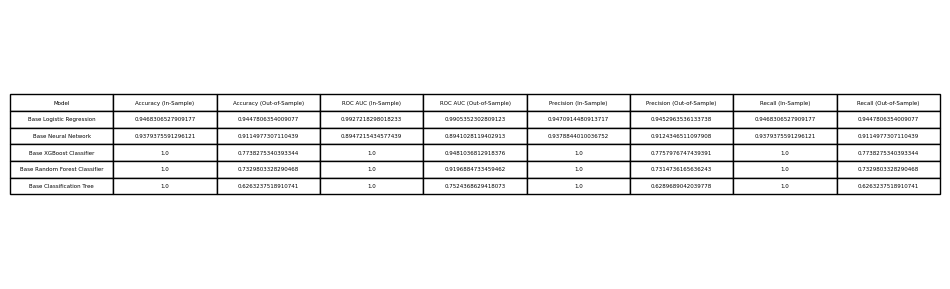

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the DataFrame as an image
fig, ax = plt.subplots(figsize=(12, len(baseline_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=baseline_results.values, colLabels=baseline_results.columns, cellLoc='center', loc='center')
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

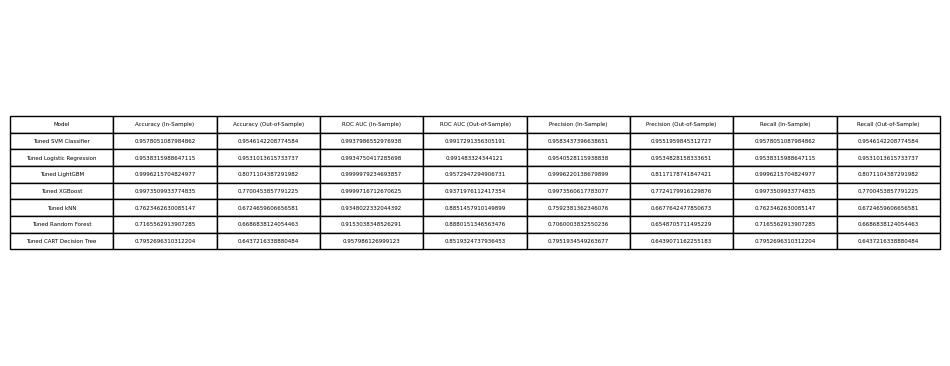

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the DataFrame as an image
fig, ax = plt.subplots(figsize=(12, len(tuned_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=tuned_results.values, colLabels=tuned_results.columns, cellLoc='center', loc='center')
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

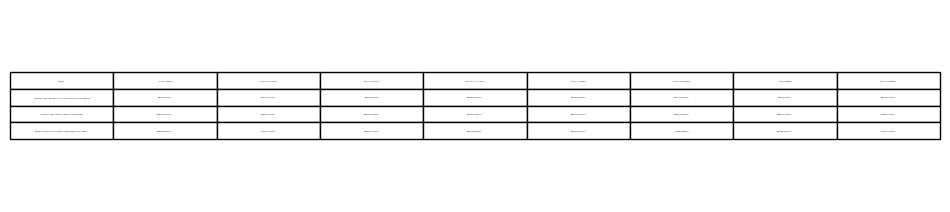

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the DataFrame as an image
fig, ax = plt.subplots(figsize=(12, len(ensemble_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=ensemble_results.values, colLabels=ensemble_results.columns, cellLoc='center', loc='center')
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

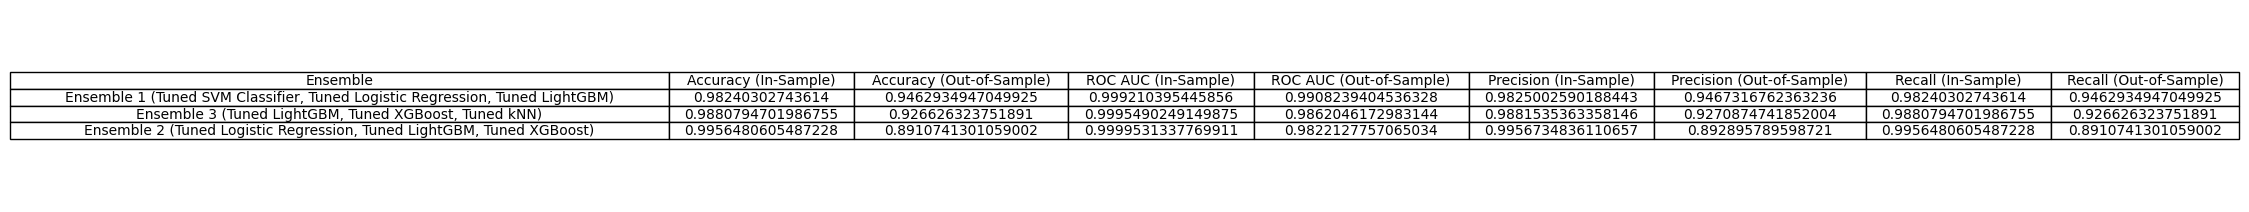

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the DataFrame as an image with adjusted text size
fig, ax = plt.subplots(figsize=(12, len(ensemble_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')

# Create the table with adjusted font size
table = ax.table(cellText=ensemble_results.values,
                 colLabels=ensemble_results.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)  # Disable automatic font scaling
table.set_fontsize(10)  # Adjust to a smaller, balanced font size
table.auto_set_column_width(col=list(range(len(ensemble_results.columns))))  # Adjust column widths

# Save as PNG
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

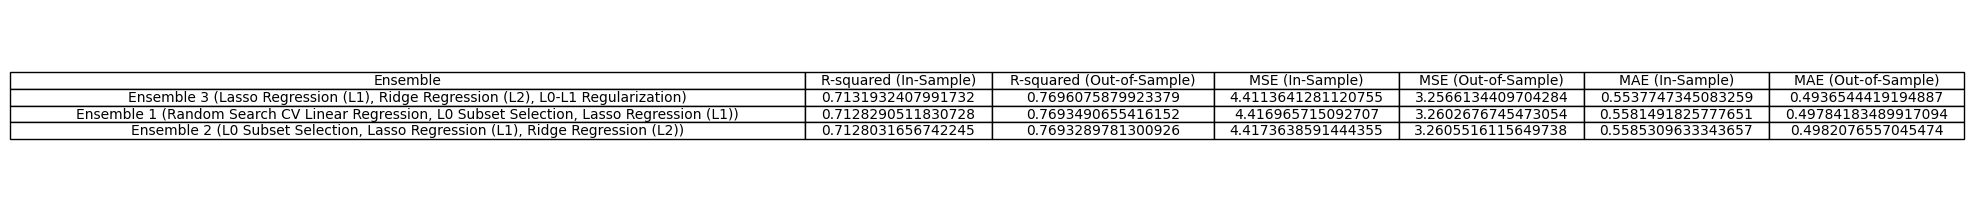

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Adjust the DataFrame table as an image with text wrapping
fig, ax = plt.subplots(figsize=(12, len(ensemble_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')

# Wrap cell text to fit within the table
wrapped_cell_text = [[f"{str(cell):<30}" if len(str(cell)) > 30 else str(cell) for cell in row] for row in ensemble_results.values]

# Create the table
table = ax.table(cellText=wrapped_cell_text,
                 colLabels=ensemble_results.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)  # Disable automatic font scaling
table.set_fontsize(10)  # Adjust font size
table.auto_set_column_width(col=list(range(len(ensemble_results.columns))))  # Adjust column widths

# Save as PNG
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")
